In [1]:
!pip install -v GDAL==3.1.4
!pip install -v Fiona==1.8.17
!pip install -v Shapely==1.7.1
!pip install geopandas

Using pip 22.2.2 from /Users/mattkrepp/opt/anaconda3/lib/python3.9/site-packages/pip (python 3.9)
  Using cached GDAL-3.1.4.tar.gz (593 kB)
  Running command python setup.py egg_info
  /Users/mattkrepp/opt/anaconda3/lib/python3.9/site-packages/setuptools/_distutils/dist.py:262: UserWarning: Unknown distribution option: 'use_2to3_fixers'
    warnings.warn(msg)
  /Users/mattkrepp/opt/anaconda3/lib/python3.9/site-packages/setuptools/_distutils/dist.py:262: UserWarning: Unknown distribution option: 'use_2to3_exclude_fixers'
    warnings.warn(msg)
  error in GDAL setup command: use_2to3 is invalid.
  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  full command: /Users/mattkrepp/opt/anaconda3/bin/python -c '
  exec(compile('"'"''"'"''"'"'
  # This is <pip-setuptools-caller> -- a caller that pip uses to run setup

In [2]:
import numpy as np
import pandas as pd
import geopandas
import matplotlib.pyplot as plt

<AxesSubplot:>

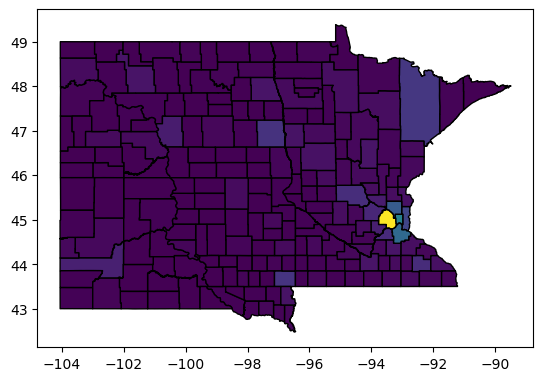

In [3]:
filename = "countiesWithStatesAndPopulation.shp"
index_col = "FIPS"
map_data = geopandas.read_file(filename = filename).set_index(["State", "NAME"])
map_plot_data = map_data.loc[["North Dakota", "South Dakota", "Minnesota"]]
map_plot_data.plot(column = "Population", cmap = "viridis", alpha = 1, edgecolor = "k")

In [4]:
def import_geo_data(filename, FIPS_name = "FIPS"):
    map_data = geopandas.read_file(filename = filename).rename(columns = {"State":"state"})
    map_data[FIPS_name] = map_data["STATEFP"].astype(str) + map_data["COUNTYFP"].astype(str)
    map_data[FIPS_name] = map_data[FIPS_name].astype(np.int64)
    map_data.set_index(FIPS_name, inplace = True)
    
    return map_data

map_data = import_geo_data(filename = filename, FIPS_name = index_col)
map_data

STATEFP COUNTYFP  COUNTYNS        AFFGEOID       NAME LSAD       ALAND  \
FIPS                                                                            
21007       21      007  00516850  0500000US21007    Ballard   06   639387454   
21017       21      017  00516855  0500000US21017    Bourbon   06   750439351   
21031       21      031  00516862  0500000US21031     Butler   06  1103571974   
21065       21      065  00516879  0500000US21065     Estill   06   655509930   
21069       21      069  00516881  0500000US21069    Fleming   06   902727151   
...        ...      ...       ...             ...        ...  ...         ...   
31073       31      073  00835858  0500000US31073     Gosper   06  1186616237   
39075       39      075  01074050  0500000US39075     Holmes   06  1094405866   
48171       48      171  01383871  0500000US48171  Gillespie   06  2740719114   
55079       55      079  01581100  0500000US55079  Milwaukee   06   625440563   
26139       26      139  01623012  0500000US26139     Ottawa   06  1459502408   

           AWATER  Population      state  \
FIPS                                       
21007    69473325      7888.0   Kentucky   
21017     4829777     19788.0   Kentucky   
21031    13943044     12879.0   Kentucky   
21065     6516335     14106.0   Kentucky   
21069     7182793     14581.0   Kentucky   
...           ...         ...        ...   
31073    11831826      1990.0   Nebraska   
39075     3695230     43960.0       Ohio   
48171     9012764     26988.0      Texas   
55079  2455383635    945726.0  Wisconsin   
26139  2765830983    291830.0   Michigan   

                                                geometry  
FIPS                                                      
21007  POLYGON ((-89.18137 37.04630, -89.17938 37.053...  
21017  POLYGON ((-84.44266 38.28324, -84.44114 38.283...  
21031  POLYGON ((-86.94486 37.07341, -86.94346 37.074...  
21065  POLYGON ((-84.12662 37.64540, -84.12483 37.646...  
21069  POLYGON ((-83.98428 38.44549, -83.98246 38.450...  
...                                                  ...  
31073  POLYGON ((-100.09510 40.43866, -100.08937 40.4...  
39075  POLYGON ((-82.22066 40.66758, -82.19327 40.667...  
48171  POLYGON ((-99.30400 30.49983, -99.28234 30.499...  
55079  POLYGON ((-88.06959 42.86726, -88.06959 42.872...  
26139  POLYGON ((-86.26432 43.11830, -86.25103 43.118...  

[3142 rows x 11 columns]

<AxesSubplot:>

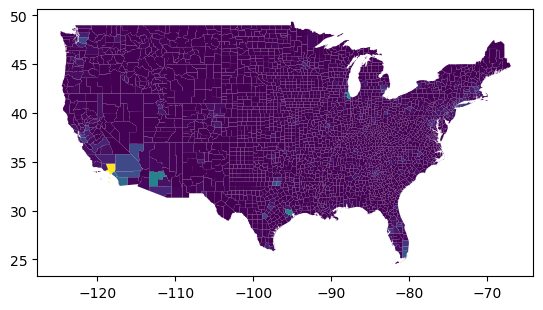

In [5]:
# plots only counties outside of Alaska and Hawaii
map_data[~map_data["state"].isin(["Hawaii", "Alaska"])].plot(column = "Population")

In [6]:
u_data = pd.read_csv("countyUnemploymentData.csv", encoding = "latin1", parse_dates = True, index_col = ["date", "fips_code"])
u_data.loc["2019-08-01"]

/var/folders/hz/vggy99z9791d4jlzyvlw3r9w0000gn/T/ipykernel_74275/2431536494.py:1: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  u_data = pd.read_csv("countyUnemploymentData.csv", encoding = "latin1", parse_dates = True, index_col = ["date", "fips_code"])


state_fips  county_fips                Location Labor Force  \
fips_code                                                                
1001                1            1       Autauga County AL      26,079   
1003                1            3       Baldwin County AL      97,939   
1005                1            5       Barbour County AL       8,652   
1007                1            7          Bibb County AL       8,670   
1009                1            9        Blount County AL      25,309   
...               ...          ...                     ...         ...   
72145              72          145  Vega Baja Municipio PR      13,088   
72147              72          147    Vieques Municipio PR       2,562   
72149              72          149   Villalba Municipio PR       7,200   
72151              72          151    Yabucoa Municipio PR       8,645   
72153              72          153      Yauco Municipio PR       9,598   

          Employed Unemployed Unemployment Rate  
fips_code                                        
1001        25,368        711               2.7  
1003        95,367      2,572               2.6  
1005         8,322        330               3.8  
1007         8,403        267               3.1  
1009        24,641        668               2.6  
...            ...        ...               ...  
72145       12,014      1,074               8.2  
72147        2,427        135               5.3  
72149        6,297        903              12.5  
72151        7,691        954                11  
72153        8,430      1,168              12.2  

[3219 rows x 7 columns]

In [7]:
for key in u_data.keys():
    u_data[key] = pd.to_numeric(u_data[key], errors = "coerce")
u_data.dtypes

state_fips             int64
county_fips            int64
Location             float64
Labor Force          float64
Employed             float64
Unemployed           float64
Unemployment Rate    float64
dtype: object

In [8]:
import copy as copy
def create_merged_geo_dataframe(data, map_data):
    data_frame_initialized = False
    matching_gdp = {}
    counties = data.groupby("fips_code").mean().index.unique()
    dates = data.groupby("date").mean().index.unique()
    for key, val in data.items():
        matching_gdp[key] = copy.copy(map_data[map_data.index.isin(counties)])
        for date in dates:
            val_slice = val.loc[date]
            val_slice.reset_index().set_index("fips_code")
            matching_gdp[key][date] = val_slice
    return matching_gdp
dates = u_data.groupby("date").mean().index.unique()
u_data = create_merged_geo_dataframe(u_data, map_data)

In [9]:
dates

DatetimeIndex(['2019-08-01', '2019-09-01', '2019-10-01', '2019-11-01',
               '2019-12-01', '2020-01-01', '2020-02-01', '2020-03-01',
               '2020-04-01', '2020-05-01', '2020-06-01', '2020-07-01',
               '2020-08-01', '2020-09-01', '2020-10-01', '2020-11-01',
               '2020-12-01', '2021-01-01', '2021-02-01', '2021-03-01',
               '2021-04-01', '2021-05-01', '2021-06-01', '2021-07-01',
               '2021-08-01'],
              dtype='datetime64[ns]', name='date', freq=None)

/Users/mattkrepp/opt/anaconda3/lib/python3.9/site-packages/geopandas/plotting.py:673: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots(figsize=figsize)


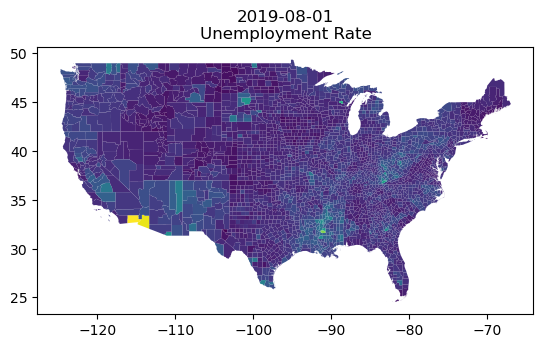

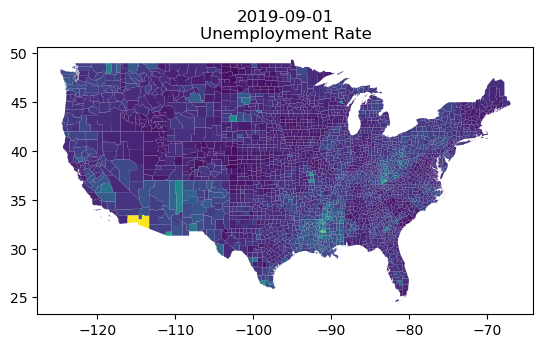

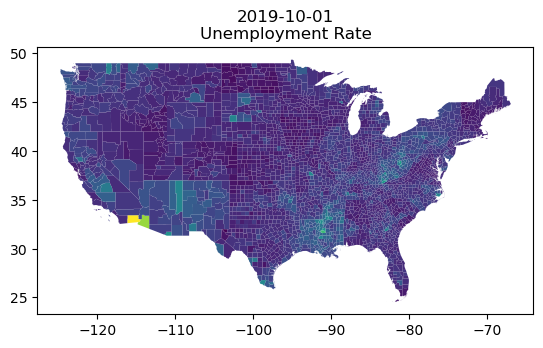

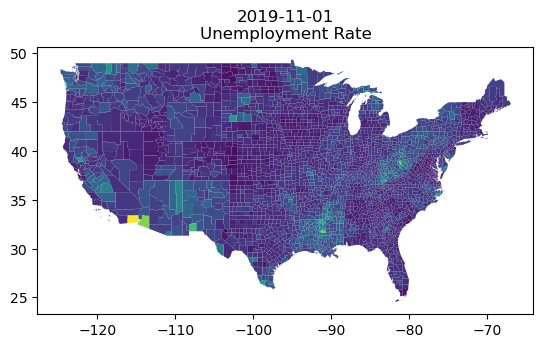

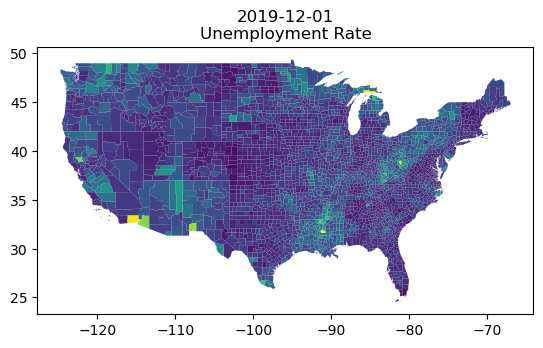

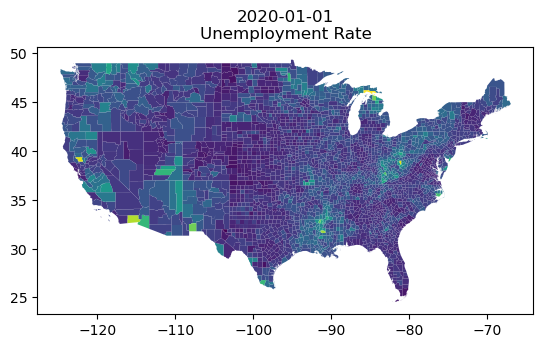

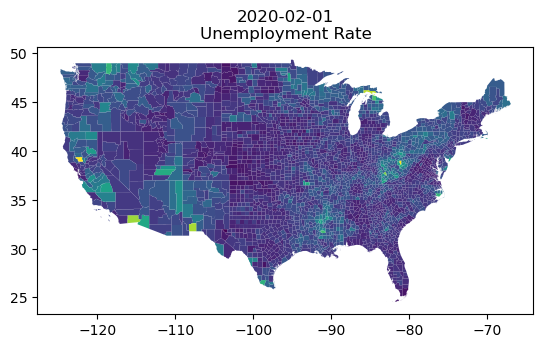

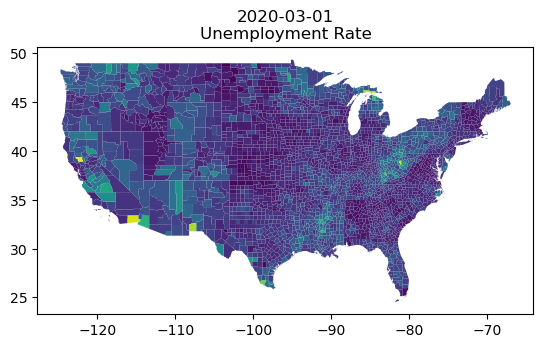

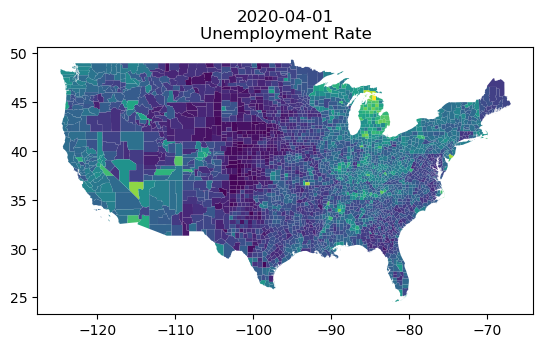

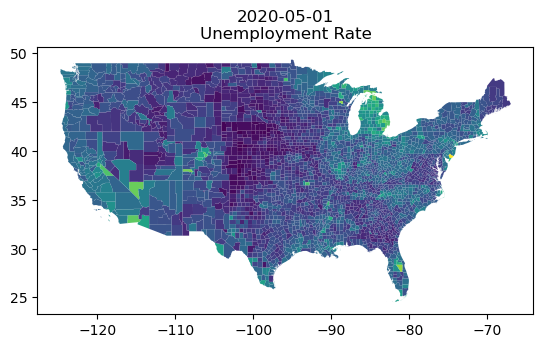

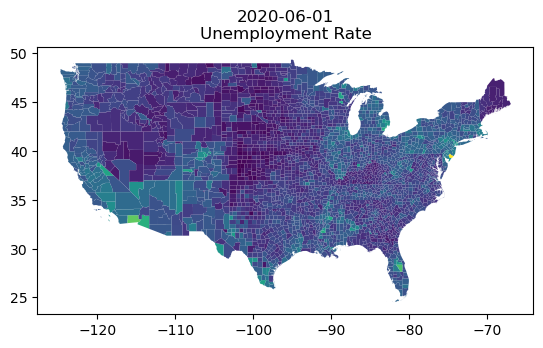

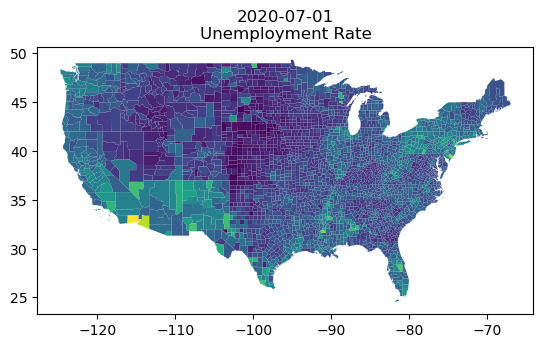

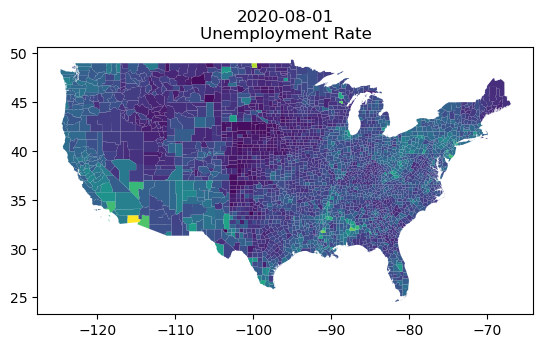

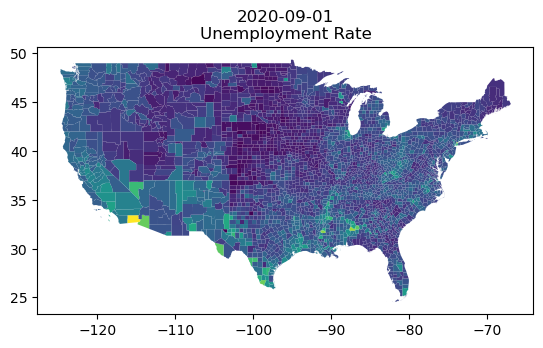

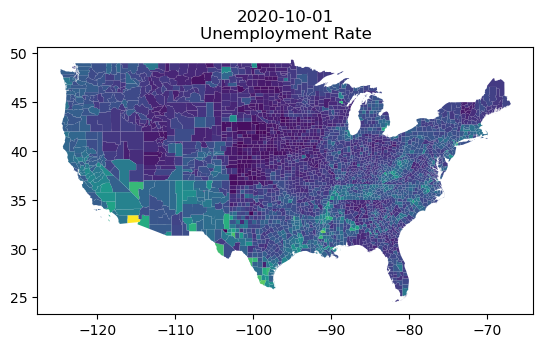

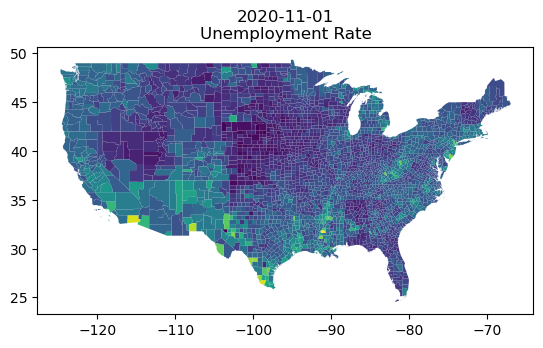

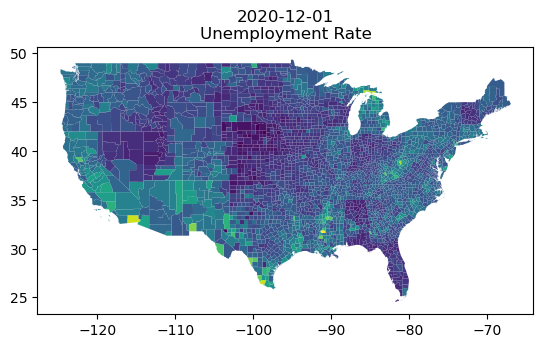

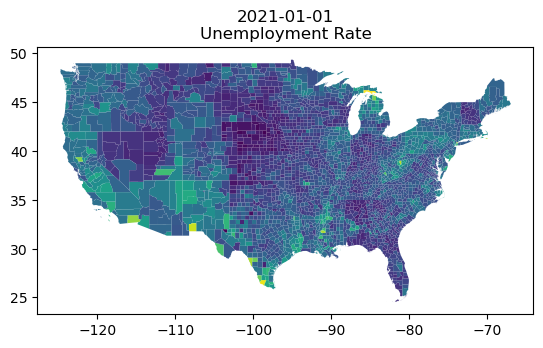

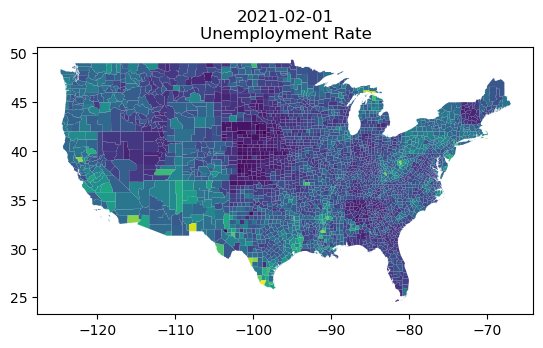

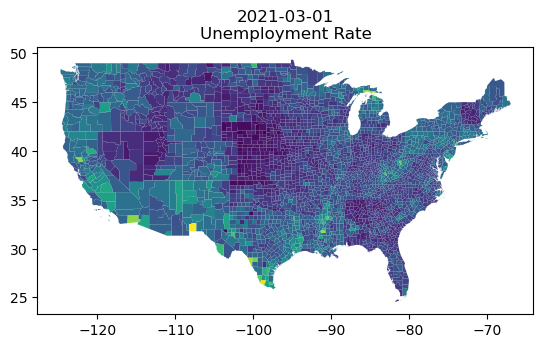

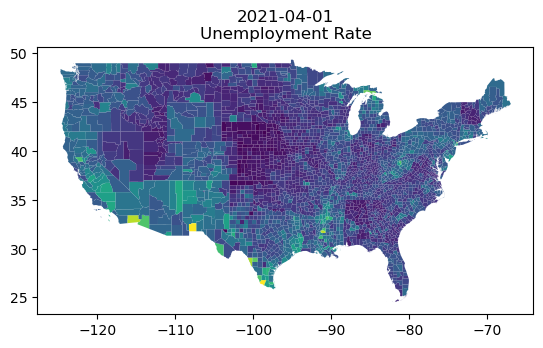

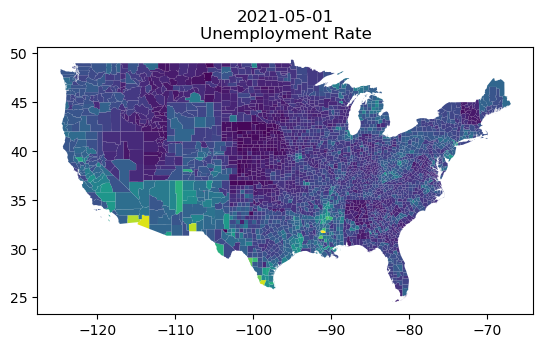

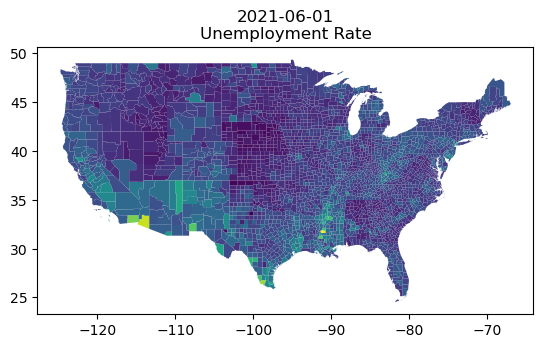

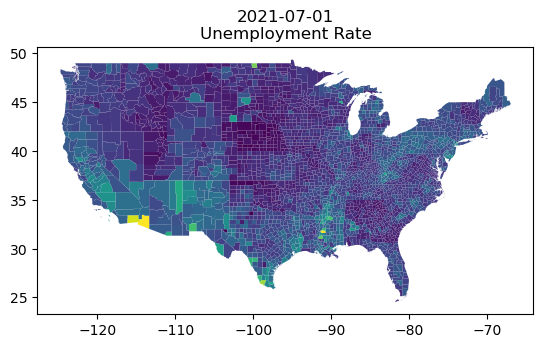

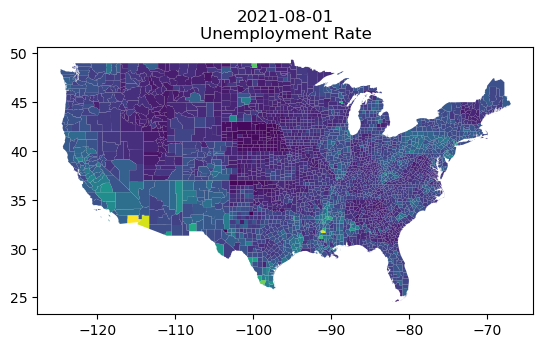

In [10]:
from matplotlib import cm
key = "Unemployment Rate"
plot_data = u_data["Unemployment Rate"].copy()
plot_data = plot_data[~plot_data["state"].isin(["Hawaii", "Alaska"])]
state_df
for date in dates:
    plot_data.plot(column = date)
    plt.title(str(date)[:10] + "\nUnemployment Rate")

In [11]:
for key, df in u_data.items():
    u_data[key] = df[~df["state"].isin(["Hawaii", "Alaska"])]

In [13]:
sorted(u_data[key]["state"].unique())

['Alabama',
 'Arizona',
 'Arkansas',
 'California',
 'Colorado',
 'Connecticut',
 'Delaware',
 'District of Columbia',
 'Florida',
 'Georgia',
 'Idaho',
 'Illinois',
 'Indiana',
 'Iowa',
 'Kansas',
 'Kentucky',
 'Louisiana',
 'Maine',
 'Maryland',
 'Massachusetts',
 'Michigan',
 'Minnesota',
 'Mississippi',
 'Missouri',
 'Montana',
 'Nebraska',
 'Nevada',
 'New Hampshire',
 'New Jersey',
 'New Mexico',
 'New York',
 'North Carolina',
 'North Dakota',
 'Ohio',
 'Oklahoma',
 'Oregon',
 'Pennsylvania',
 'Rhode Island',
 'South Carolina',
 'South Dakota',
 'Tennessee',
 'Texas',
 'Utah',
 'Vermont',
 'Virginia',
 'Washington',
 'West Virginia',
 'Wisconsin',
 'Wyoming']